# Drafting the prototype of what will be a module for adding filtered version of the image


In [1]:
%matplotlib inline

# FilterBasedTransformations: 
- smoothing: gaussian([4:12])
- noise: gaussian(0.01:0.1), speckle(0.01:0.1), salt, pepper, s&p

## Constraints:
- images are 2^8 pixel-depth

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
import skimage.util as util

img = io.imread('http://imagej.net/_images/9/90/Blobs.png')#data.camera()
img = color.rgb2gray(img)
#img = img.astype(np.uint16)
print(img.dtype) 

float64


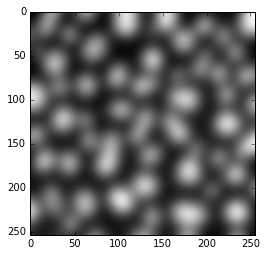

In [3]:
gaussian_param = 8 
import skimage.filters as filters

out1 = filters.gaussian(img, gaussian_param)
plt.imshow(out1,cmap='gray');

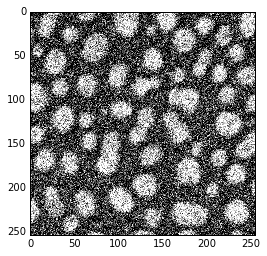

In [9]:
noise_gaussian_param = 0.1
import skimage.util as util
out2=util.random_noise(img, mode='gaussian', seed=None, clip=True, mean=0, var=noise_gaussian_param)
#plt.imshow(out,vmin=0,vmax=1, cmap='gray', interpolation='nearest');
plt.imshow(out2, cmap='gray', interpolation='nearest');

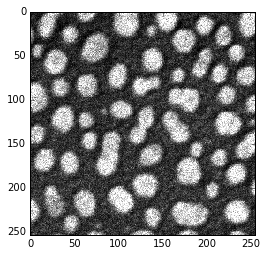

In [10]:
out3=util.random_noise(img, mode='poisson', seed=None, clip=True)
plt.imshow(out3, cmap='gray', interpolation='nearest');


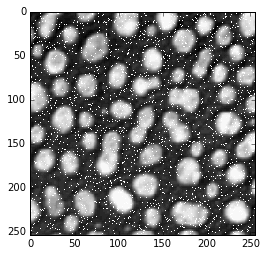

In [11]:
out4=util.random_noise(img, mode='salt', seed=None, clip=True)
plt.imshow(out4, cmap='gray', interpolation='nearest');

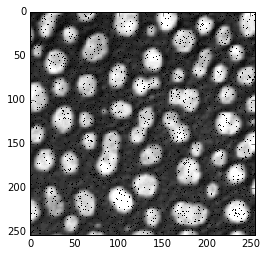

In [12]:
out5=util.random_noise(img, mode='pepper', seed=None, clip=True)
plt.imshow(out5, cmap='gray', interpolation='nearest');

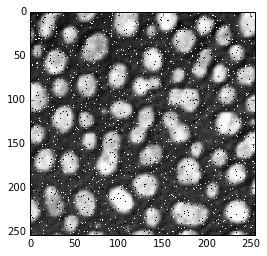

In [13]:
out6=util.random_noise(img, mode='s&p', seed=None, clip=True)
plt.imshow(out6, cmap='gray', interpolation='nearest');

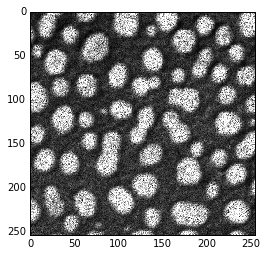

In [14]:
noise_speckle_param = 0.1
import skimage.util as util
out7=util.random_noise(img, mode='speckle', seed=None, clip=True, mean=0, var=noise_speckle_param)
#plt.imshow(out,vmin=0,vmax=1, cmap='gray', interpolation='nearest');
plt.imshow(out7, cmap='gray', interpolation='nearest');

0 255 uint8


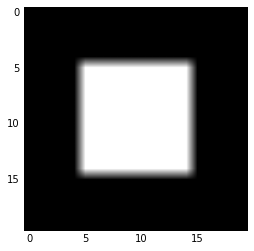

In [117]:
plt.imshow(image,cmap='gray'); #an input image
print(image.min(), image.max(), image.dtype)

In [132]:
#You 
image = image.astype(np.uint16)
print(image.dtype) 

uint16
uint16


float32


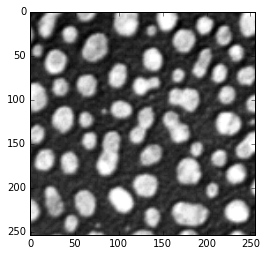

In [9]:
#Only using scipy
from scipy import ndimage
img = ndimage.imread("/Users/dani11/Dropbox/prog/Python/ImageXD/imageXDaugmentation/examples/Blobs.png",flatten=True, mode=None)
plt.imshow(img,cmap='gray');
print(img.dtype) 

float32


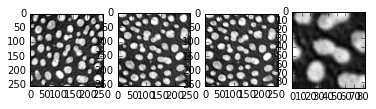

In [10]:
plt.subplot(141)
plt.imshow(img,cmap='gray');
print(img.dtype)

angle = 90
#Rotate
img1 = ndimage.rotate(img, angle)
plt.subplot(142)
plt.imshow(img1,cmap='gray');
#Rotate no reshape
img1_noreshape = ndimage.rotate(img, angle, reshape=False)
plt.subplot(143)
plt.imshow(img1_noreshape,cmap='gray');
#Rotate and crop
lx, ly = img.shape
img1 = ndimage.rotate(img, angle)
crop_img1 = img1[lx/3:-lx/3, ly/3:-ly/3]
plt.subplot(144)
plt.imshow(crop_img1,cmap='gray');

In [35]:
img.shape

(254, 256)

In [12]:
number_rotate = 4
theta = np.int(360/number_rotate)
ang = range(theta,360,theta)
print(ang)

[90, 180, 270]


In [46]:
def rotate(img,number_rotate):
    theta = np.int(360/number_rotate)
    ang = range(theta,360,theta)
    list_images = []
    for i in ang:
        im_rotated = ndimage.rotate(img,i) #.astype(np.uint8)
        list_images.append(im_rotated)
    return list_images

In [71]:
def fAugmentation(img, bPoisson=True, bSpeckle=True, bGaussian=True, b3Rotations=True):
    """ Function to augment input sample, i.e., create new samples with realistic distortions
    Args:
    
    Returns:
        List with new images
    """
    limag = []
    noise_speckle_param = 0.1
    imgPoisson=util.random_noise(img, mode='poisson', seed=None, clip=True)
    imgSpeckle=util.random_noise(img, mode='speckle', seed=None, clip=True, mean=0, var=noise_speckle_param)
    imgGaussian =util.random_noise(img, mode='gaussian',seed=None, clip=True, mean=0, var=noise_speckle_param)

    limag.append(img)
    limag.append(imgPoisson)
    limag.append(imgSpeckle)
    limag.append(imgGaussian)
    listRotations=rotate(img,4)
    limag.extend(listRotations) #not working here
    print('Augmented',len(limag),'times')
    return limag

('Augmented', 7, 'times')


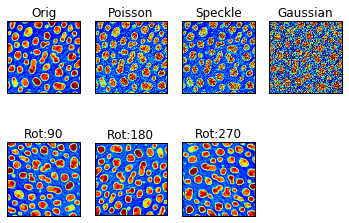

In [96]:
output = fAugmentation(img)
strTitle = ['Orig','Poisson','Speckle','Gaussian','Rot:90','Rot:180','Rot:270']
n = len(output)
for i in range(n):
    plt.subplot(2,np.rint(np.double(n)/2),i+1,title=strTitle[i])
    plt.imshow(output[i])
    plt.xticks([])
    plt.yticks([])      